# Numpy

In [5]:
import numpy as np
import pprint

## Reading market data from Google

In [2]:
markets = {}
values = []

with open("markets.csv", "r") as file:
    for l in file.readlines():
        name, url, v, change_perc = l.split(";")
        markets[name] = url
        v = v.replace(",", "")
        change_perc = change_perc.replace("%", "")
        vals = [float(v), float(change_perc)]
        values.append(vals)

In [6]:
# we have a lists and a dictionary
pprint.pprint (values)
pprint.pprint (markets)

[[67.87, 3.08],
 [25733.6, -0.34],
 [1202.9, 0.24],
 [2861.82, -0.04],
 [7574.24, 0.11],
 [6360.59, -2.01],
 [110.5, 0.31],
 [7889.1, 0.38],
 [2.82, -0.74],
 [1.29, 0.12],
 [22362.55, 0.64],
 [12.06, -6.22],
 [1721.69, 0.21],
 [14.74, -0.18],
 [1.16, 0.27]]
{'10-Yr Bond': 'https://finance.yahoo.com/world-indices/quote/^TNX?p=^TNX',
 'BTC-USD': 'https://finance.yahoo.com/world-indices/quote/BTC-USD?p=BTC-USD',
 'Crude Oil': 'https://finance.yahoo.com/world-indices/quote/CL=F?p=CL=F',
 'Dow 30': 'https://finance.yahoo.com/world-indices/quote/^DJI?p=^DJI',
 'EUR/USD': 'https://finance.yahoo.com/world-indices/quote/EURUSD=X?p=EURUSD=X',
 'FTSE 100': 'https://finance.yahoo.com/world-indices/quote/^FTSE?p=^FTSE',
 'GBP/USD': 'https://finance.yahoo.com/world-indices/quote/GBPUSD=X?p=GBPUSD=X',
 'Gold': 'https://finance.yahoo.com/world-indices/quote/GC=F?p=GC=F',
 'Nasdaq': 'https://finance.yahoo.com/world-indices/quote/^IXIC?p=^IXIC',
 'Nikkei 225': 'https://finance.yahoo.com/world-indices/qu

## Converting to numpy array

In [7]:
# we have a matrix of values now
array = np.array(values)
print(array)
print("number of elements: %d" % array.size)

[[ 6.787000e+01  3.080000e+00]
 [ 2.573360e+04 -3.400000e-01]
 [ 1.202900e+03  2.400000e-01]
 [ 2.861820e+03 -4.000000e-02]
 [ 7.574240e+03  1.100000e-01]
 [ 6.360590e+03 -2.010000e+00]
 [ 1.105000e+02  3.100000e-01]
 [ 7.889100e+03  3.800000e-01]
 [ 2.820000e+00 -7.400000e-01]
 [ 1.290000e+00  1.200000e-01]
 [ 2.236255e+04  6.400000e-01]
 [ 1.206000e+01 -6.220000e+00]
 [ 1.721690e+03  2.100000e-01]
 [ 1.474000e+01 -1.800000e-01]
 [ 1.160000e+00  2.700000e-01]]
number of elements: 30


## Recover yesterday's price

In [8]:
# without matrices we need to do it using a loop or accesing each element
price = array[0,0]
delta = array[0,1]
price_yesterday = price + delta
print(price, price_yesterday)

67.87 70.95


Yesterday's prices

In [9]:
#using matrix sum
yesterday = array[:, 0] + array[:, 1]
print(yesterday)

[7.095000e+01 2.573326e+04 1.203140e+03 2.861780e+03 7.574350e+03
 6.358580e+03 1.108100e+02 7.889480e+03 2.080000e+00 1.410000e+00
 2.236319e+04 5.840000e+00 1.721900e+03 1.456000e+01 1.430000e+00]


In [10]:
#using accumulative sum
period = np.cumsum(array, 1)[:, 0:2]
print(period)

[[6.787000e+01 7.095000e+01]
 [2.573360e+04 2.573326e+04]
 [1.202900e+03 1.203140e+03]
 [2.861820e+03 2.861780e+03]
 [7.574240e+03 7.574350e+03]
 [6.360590e+03 6.358580e+03]
 [1.105000e+02 1.108100e+02]
 [7.889100e+03 7.889480e+03]
 [2.820000e+00 2.080000e+00]
 [1.290000e+00 1.410000e+00]
 [2.236255e+04 2.236319e+04]
 [1.206000e+01 5.840000e+00]
 [1.721690e+03 1.721900e+03]
 [1.474000e+01 1.456000e+01]
 [1.160000e+00 1.430000e+00]]


### Normalizing data

In [11]:
print(period / np.linalg.norm(period))

[[1.31348526e-03 1.37309237e-03]
 [4.98021280e-01 4.98014700e-01]
 [2.32796732e-02 2.32843179e-02]
 [5.53846822e-02 5.53839081e-02]
 [1.46583949e-01 1.46586077e-01]
 [1.23096231e-01 1.23057332e-01]
 [2.13850186e-03 2.14450127e-03]
 [1.52677421e-01 1.52684775e-01]
 [5.45753415e-05 4.02541526e-05]
 [2.49653158e-05 2.72876708e-05]
 [4.32781491e-01 4.32793877e-01]
 [2.33396673e-04 1.13021275e-04]
 [3.33197942e-02 3.33238584e-02]
 [2.85262601e-04 2.81779068e-04]
 [2.24494313e-05 2.76747299e-05]]


## SNAP historical data

In [21]:
# we load data scrapped from Yahoo finance for SNAP into a numpy array
import re
import csv

values = []
dates = []
header =None
with open("snap.csv", newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if header is None:
            header = row
        else:
            values.append(row[1:])
            dates.append(row[0])
        
stock = np.array(values)
print(stock)

[['11.80' '11.86' '11.57' '11.73' '11.73' '13977800']
 ['12.16' '12.17' '11.63' '11.89' '11.89' '22444600']
 ['12.30' '12.58' '12.10' '12.17' '12.17' '14652900']
 ['12.27' '12.30' '12.11' '12.18' '12.18' '13643600']
 ['12.65' '12.73' '12.31' '12.34' '12.34' '13042700']
 ['12.24' '12.77' '12.24' '12.57' '12.57' '15724400']
 ['12.14' '12.50' '12.09' '12.31' '12.31' '15883900']
 ['12.15' '12.67' '12.07' '12.31' '12.31' '24290700']
 ['12.83' '12.84' '12.04' '12.23' '12.23' '61183600']
 ['13.01' '13.37' '12.78' '13.12' '13.12' '50202000']
 ['12.73' '13.13' '12.71' '13.05' '13.05' '17656600']
 ['12.71' '13.01' '12.66' '12.73' '12.73' '11512900']
 ['12.31' '12.75' '12.18' '12.70' '12.70' '11731900']
 ['12.55' '12.61' '12.20' '12.38' '12.38' '11228000']
 ['12.26' '12.57' '12.15' '12.50' '12.50' '14874500']
 ['12.74' '12.75' '12.00' '12.27' '12.27' '27156900']
 ['13.14' '13.18' '12.52' '12.83' '12.83' '28282700']
 ['13.07' '13.40' '12.77' '13.37' '13.37' '20037300']
 ['13.32' '13.44' '13.16' '1

In [23]:
from numpy import genfromtxt
data = genfromtxt('snap.csv', delimiter=',')
data = data[1:, 1:]
print(data)

[[1.180000e+01 1.186000e+01 1.157000e+01 1.173000e+01 1.173000e+01
  1.397780e+07]
 [1.216000e+01 1.217000e+01 1.163000e+01 1.189000e+01 1.189000e+01
  2.244460e+07]
 [1.230000e+01 1.258000e+01 1.210000e+01 1.217000e+01 1.217000e+01
  1.465290e+07]
 [1.227000e+01 1.230000e+01 1.211000e+01 1.218000e+01 1.218000e+01
  1.364360e+07]
 [1.265000e+01 1.273000e+01 1.231000e+01 1.234000e+01 1.234000e+01
  1.304270e+07]
 [1.224000e+01 1.277000e+01 1.224000e+01 1.257000e+01 1.257000e+01
  1.572440e+07]
 [1.214000e+01 1.250000e+01 1.209000e+01 1.231000e+01 1.231000e+01
  1.588390e+07]
 [1.215000e+01 1.267000e+01 1.207000e+01 1.231000e+01 1.231000e+01
  2.429070e+07]
 [1.283000e+01 1.284000e+01 1.204000e+01 1.223000e+01 1.223000e+01
  6.118360e+07]
 [1.301000e+01 1.337000e+01 1.278000e+01 1.312000e+01 1.312000e+01
  5.020200e+07]
 [1.273000e+01 1.313000e+01 1.271000e+01 1.305000e+01 1.305000e+01
  1.765660e+07]
 [1.271000e+01 1.301000e+01 1.266000e+01 1.273000e+01 1.273000e+01
  1.151290e+07]
 [1.

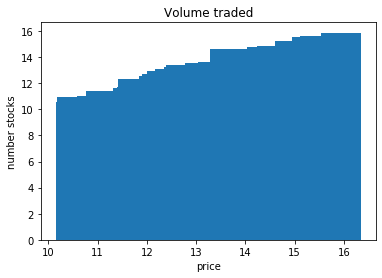

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.get_yaxis().get_major_formatter().set_scientific(False)

ax.bar(data[:,0], data[:,4])
ax.autoscale_view()

plt.title("Volume traded")
plt.ylabel("number stocks")
plt.xlabel("price")
plt.show()

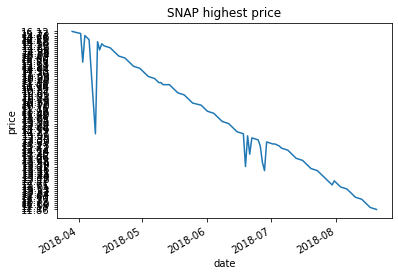

In [26]:
import datetime
import matplotlib
import matplotlib.dates as mdates


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dates2 = matplotlib.dates.date2num([datetime.datetime.strptime(d, "%b %d %Y") for d in dates])

plt.plot_date(dates2,stock[:,1],'-')
plt.gcf().autofmt_xdate()

plt.title("SNAP highest price")
plt.ylabel("price")
plt.xlabel("date")
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U9'), dtype('<U9')) -> dtype('<U9')

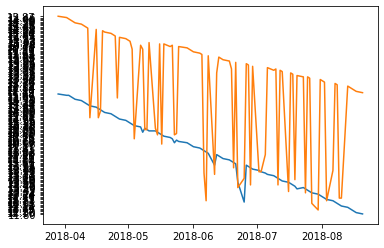

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dates2 = matplotlib.dates.date2num([datetime.datetime.strptime(d, "%b %d %Y") for d in dates])

plt.plot_date(dates2,stock[:,0],'-')
plt.plot_date(dates2,stock[:,3],'-')
plt.plot_date(dates2,(stock[:,1] + stock[:,2])/2,'-')
plt.gcf().autofmt_xdate()

plt.title("SNAP open and close prices")
plt.ylabel("price")
plt.xlabel("date")
plt.legend(['open', 'close' ], loc='lower left')
plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U9'), dtype('<U9')) -> dtype('<U9')

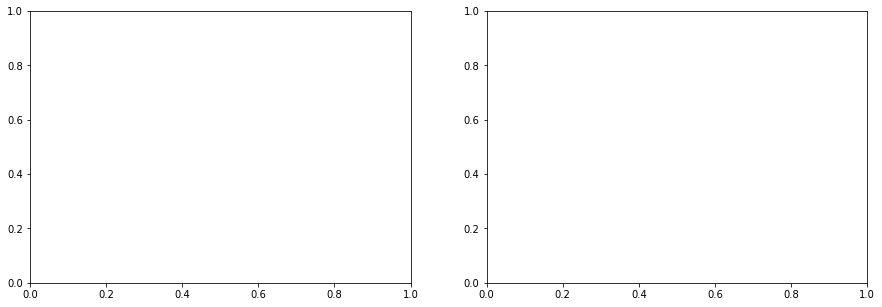

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

f.set_figwidth(15)
f.set_figheight(5)

ax1.errorbar(dates2, (stock[:,1] + stock[:,2])/2,(stock[:,1] - stock[:,2])/2)
ax1.set_title("SNAP average price")
ax1.set_ylabel("price")
ax1.set_xlabel("date")
ax1.legend(['average price '], loc='lower left')

ax2.plot(dates2, stock[:,1], '-')
ax2.plot(dates2, stock[:,2], '-')
ax2.set_title("SNAP high and low prices")
ax2.set_ylabel("price")
ax2.set_xlabel("date")
ax2.legend(['high', 'low' ], loc='lower left')


plt.show()
